CNN 성능개선
==
다루는 내용
--
- 데이터 변형 (Augmentation)
- 적은 데이터로 성능 향상

데이터
--
- https://goo.gl/j1s9KR


In [1]:
import numpy as np
import pandas as pd

## 데이터 로드

In [2]:
train = pd.read_csv("data/image2-data/train.csv")

print(train.shape)
train.head()

(100, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


### 이미지 보기

In [3]:
from scipy.ndimage import imread

def load_images(filenames):
    images = []

    for filename in filenames:
        image = imread(filename)
        images.append(image)

    images = np.array(images)

    return images

In [4]:
filenames = "data/image2-data/train/" + train["filename"]

X_train = load_images(filenames)
X_train.shape

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


(100,)

In [5]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(100,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

### 샘플 이미지

[0 0 1 1 1 1 0 0 1 0]


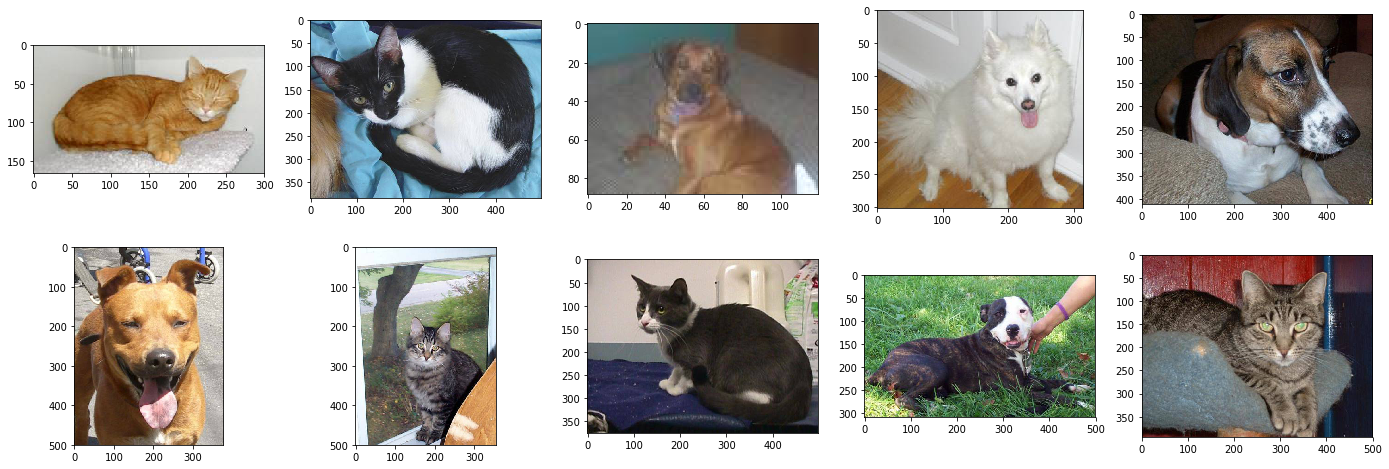

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 8)

print(y_train[0:10])

axes[0][0].imshow(X_train[0])
axes[0][1].imshow(X_train[1])
axes[0][2].imshow(X_train[2])
axes[0][3].imshow(X_train[3])
axes[0][4].imshow(X_train[4])
axes[1][0].imshow(X_train[5])
axes[1][1].imshow(X_train[6])
axes[1][2].imshow(X_train[7])
axes[1][3].imshow(X_train[8])
axes[1][4].imshow(X_train[9])

### 이미지 크기 조절

In [7]:
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in original_images:
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


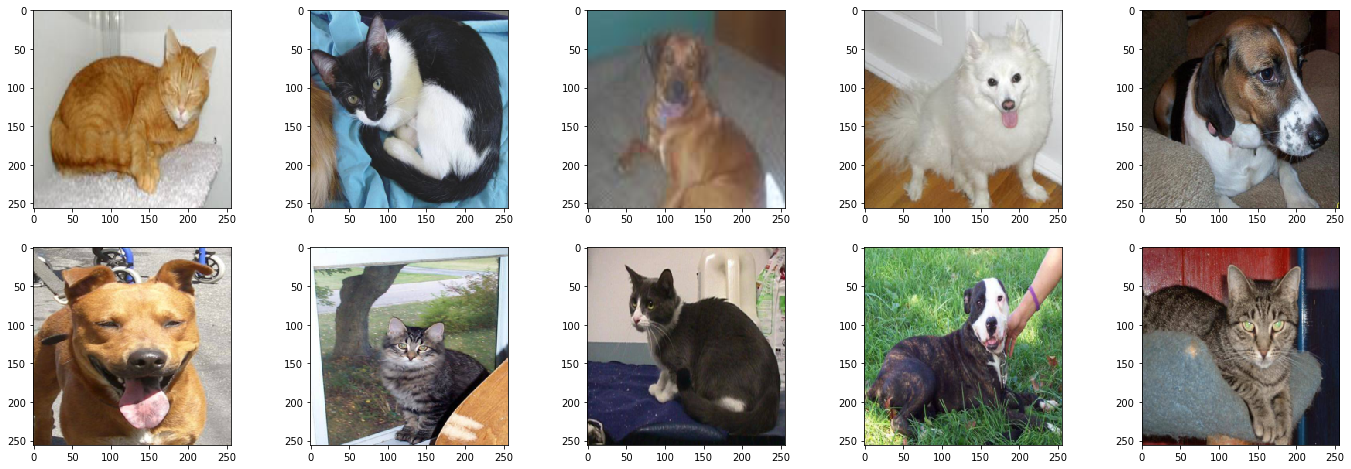

In [8]:
resized_images = resize_image(X_train, size=(256, 256))

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 8)

axes[0][0].imshow(resized_images[0])
axes[0][1].imshow(resized_images[1])
axes[0][2].imshow(resized_images[2])
axes[0][3].imshow(resized_images[3])
axes[0][4].imshow(resized_images[4])
axes[1][0].imshow(resized_images[5])
axes[1][1].imshow(resized_images[6])
axes[1][2].imshow(resized_images[7])
axes[1][3].imshow(resized_images[8])
axes[1][4].imshow(resized_images[9])

## 데이터 확장(Augmentation)

In [9]:
# https://keras.io/preprocessing/image/ 참고
from keras.preprocessing.image import ImageDataGenerator

# rotation_range - 회전. 0 ~ 360
# width_shift_range - 좌우 shifting. 소수점이 퍼센티지(%)
# height_shift_range - 위아래 shifting. 소수점이 퍼센티지(%)
# horizontal_flip - 좌우 반전. True / False
# vertical_flip - 위아래 반전. True / False
# zoom_range - 확대. (min, max)
# random crop은 다음의 링크 https://jkjung-avt.github.io/keras-image-cropping/ 참고

generator = ImageDataGenerator(rotation_range=45,
                               width_shift_range=0.3,
                               height_shift_range=0.3,
                               zoom_range=(0.7, 1.3),
                               horizontal_flip=True)
generator

Using TensorFlow backend.
/Users/hwa-jongkim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


변형 예
--

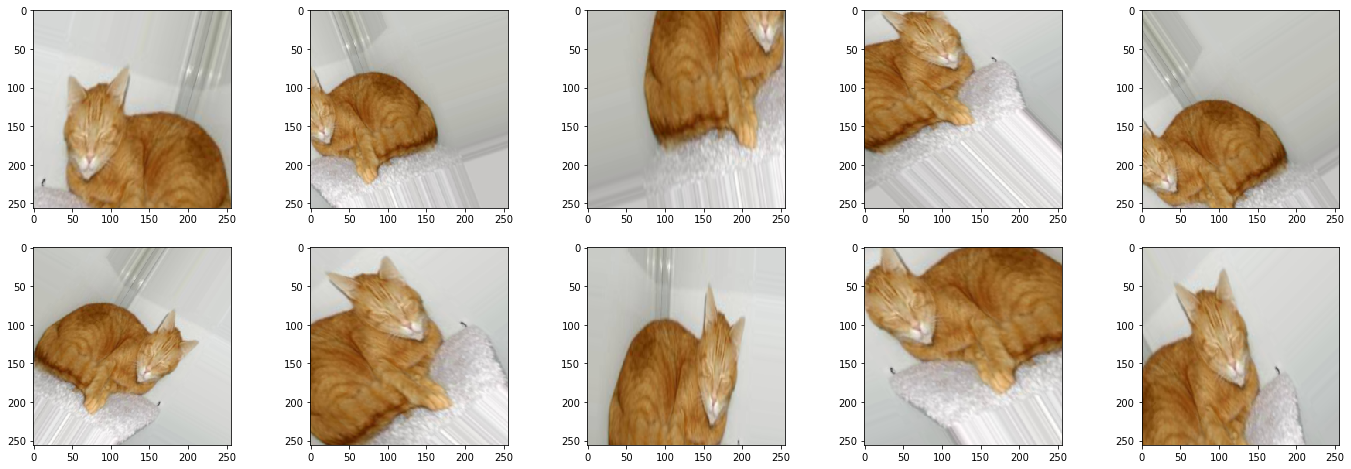

In [10]:
original_image = resized_images[0]

transformed_images = [generator.random_transform(original_image) for _ in range(10)]

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 8)

axes[0][0].imshow(transformed_images[0])
axes[0][1].imshow(transformed_images[1])
axes[0][2].imshow(transformed_images[2])
axes[0][3].imshow(transformed_images[3])
axes[0][4].imshow(transformed_images[4])
axes[1][0].imshow(transformed_images[5])
axes[1][1].imshow(transformed_images[6])
axes[1][2].imshow(transformed_images[7])
axes[1][3].imshow(transformed_images[8])
axes[1][4].imshow(transformed_images[9])